## 선형 회귀분석 실습

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1단계: 데이터 준비

In [2]:
df = pd.read_csv("./data/auto-mpg.csv", header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
0    398 non-null float64
1    398 non-null int64
2    398 non-null float64
3    398 non-null object
4    398 non-null float64
5    398 non-null float64
6    398 non-null int64
7    398 non-null int64
8    398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [3]:
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


#### 컬럼 이름 (변수, 특성 이름)지정

In [4]:
df.columns=['mpg', 'cylinders', 'displacement', 'horsepower', 
            'weight', 'acceleration', 'model year', 'origin', 'name']
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


#### 최대 열 수 설정

In [15]:
pd.set_option('display.max_columns',10)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


### 2단계: 데이터 탐색

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null float64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
name            398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [7]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
# horsepower가 숫자형이 아니라 object로 표시됨 !! 
# 이걸 바꿔줄거임!

In [10]:
df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

####  horsepower 열에서 ?를 NaN값으로 대체

In [ ]:
df['horsepower'].replace('?', np.nan, inplace = True)

#### horsepower 열에서 NaN인 행을 삭제

In [12]:
df.dropna(subset=['horsepower'], axis = 0, inplace = True) 
# aixs = 0 : 행
# inplace = True : 현재행에서 

#### 문자열 데이터를 실수형 데이터로 변환

In [13]:
df['horsepower'] = df['horsepower'].astype('float')

In [14]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


### 3단계 : 분석에 사용될 특성(열, 변수) 선택 (연비, 실린더, 마력, 중력)

In [16]:
ndf = df[[ 'mpg', 'cylinders','horsepower', 'weight' ]]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0


####  종속변수(mpg)와 다른변수간의 선형관계 여부 확인

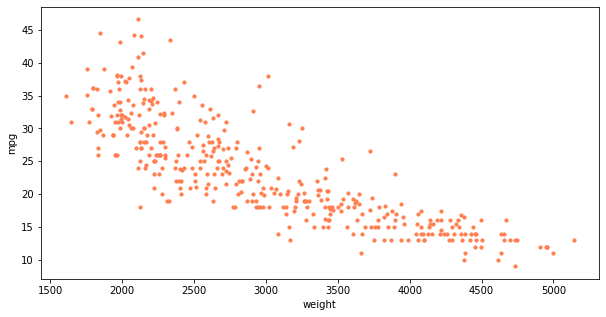

In [18]:
ndf.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10, 5))
plt.show()

#### seaborn으로 산점도 그리기

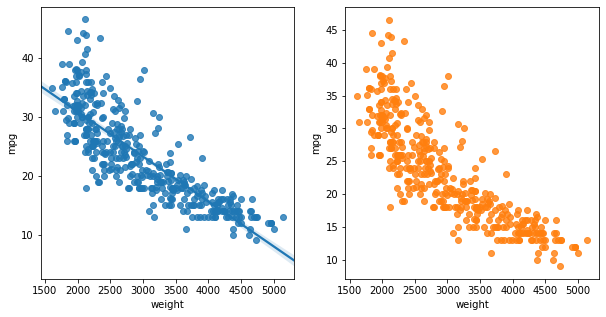

In [28]:
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

sns.regplot(x='weight', y='mpg', data=ndf, ax=ax1)  #회귀선을 기본적으로 표시해줌
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax2, fit_reg=False)

plt.show()
plt.close()

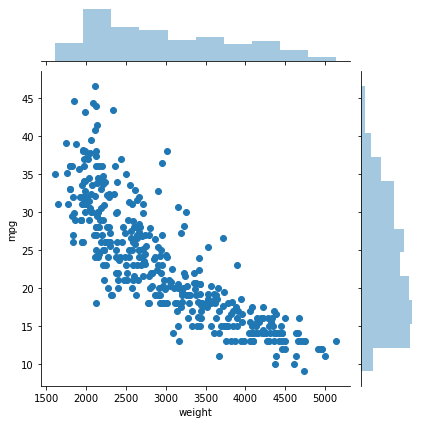

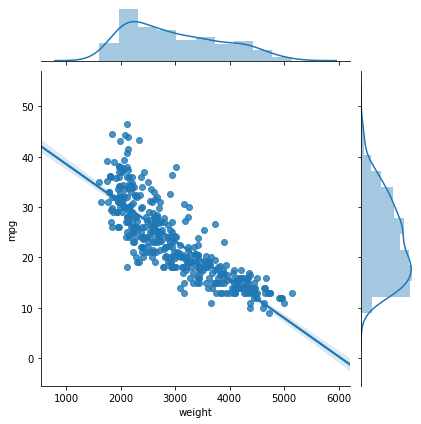

In [29]:
sns.jointplot(x='weight', y='mpg', data=ndf)
sns.jointplot(x='weight', y='mpg', data=ndf, kind='reg')  #회귀선 표시
plt.show()
plt.close()

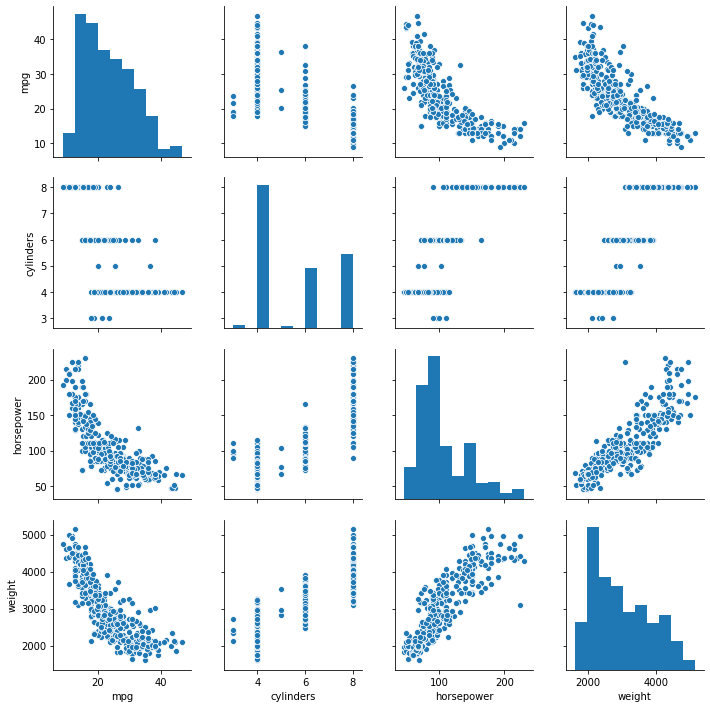

In [21]:
sns.pairplot(ndf)
plt.show()
plt.close()

### 4단계 : 훈련 데이터와 테스트 데이터로 분리

In [30]:
X= ndf[['weight']]   #독립변수 X : 무게
Y=ndf['mpg']    #종속변수 Y : 연비

#### train data 와 test data를 7:3 비율로 분리

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)  
#랜덤 추출값 10

In [34]:
print('train data  개수 :', len(X_train))
print('test data  개수 :', len(X_test))

train data  개수 : 274
test data  개수 : 118


### 5단계 : 단순회귀분석 - 학습

In [36]:
from sklearn.linear_model import LinearRegression  
#선형회귀 라이브러리의 선형회귀분석 모듈 

In [37]:
lr = LinearRegression()  #단순 선형회귀분석 객체 생성

lr.fit(X_train, Y_train)  #학습

r_square = lr.score(X_test, Y_test) # 결정 계수 계산

print(r_square )

0.6822458558299325


In [38]:
print('기울기 a : ', lr.coef_)
print('절편 b : ', lr.intercept_)

기울기 a :  [-0.00775343]
절편 b :  46.710366257280086


In [43]:
y_predict =lr.predict(X)
# 독립변수에 대한 예측된 종속변수 값

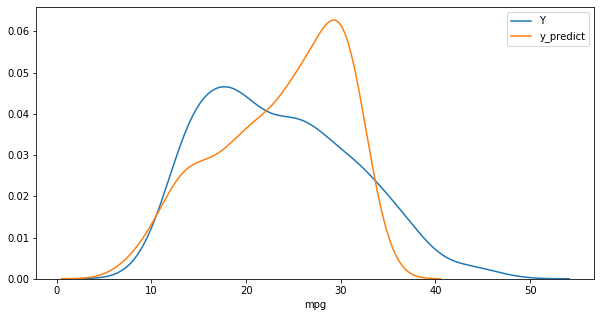

In [44]:
plt.figure(figsize=(10, 5))
ax1 = sns.distplot(Y, hist=False, label='Y')
# 실제 Y값
ax2 = sns.distplot(y_predict, hist=False, label='y_predict', ax=ax1)
# 독립변수에 대한 예측된 종속변수 값

plt.show()
plt.close()